In [2]:
url = "https://spendnetwork.com/consulting-contracts"

<Response [200]>


In [25]:
import requests
from bs4 import BeautifulSoup
Nrows = []
url = "https://spendnetwork.com/consulting-contracts/"
page = requests.get(url)
soup = BeautifulSoup(page.content, "html.parser")
rows = soup.find_all("tr") # finds all table rows
for row in rows:
    outrow = []
    for item in row:
        outrow.append(item.text)
    Nrows.append(outrow)    

In [26]:
results = soup.find(id="table_1")
#print(results.prettify)


In [27]:
import pandas as pd
df = pd.DataFrame(Nrows)
#df.head()

In [28]:
len(df)

12

In [16]:
from os import listdir
from os.path import isfile, join
mypath = "contracts/data/"
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(onlyfiles)

['Consulting-contracts (3).csv', 'Consulting-contracts (10).csv', 'Consulting-contracts (11).csv', 'Consulting-contracts (2).csv', 'Consulting-contracts (5).csv', 'Consulting-contracts (9).csv', 'Consulting-contracts (8).csv', 'Consulting-contracts (4).csv', 'Consulting-contracts (7).csv', 'Consulting-contracts (6).csv', 'Consulting-contracts (12).csv', 'Consulting-contracts (1).csv', 'Consulting-contracts.csv', 'Brexit contracts (1).csv']


In [58]:
import pandas as pd
contracts_df = pd.DataFrame()
for file in onlyfiles:
    p2f = mypath + file
    df = pd.read_csv(p2f)
    out_df = pd.concat((contracts_df, df))
    contracts_df = out_df    


In [60]:
out_df['award_value'].replace(',','', regex=True, inplace=True)
out_df['award_value'] = out_df['award_value'].apply(pd.to_numeric,errors='coerce')
out_df.replace('NaN','np.nan,inplace=1')

,incremental_id,tender_title,buyer,award_date,award_value,contract_start,contract_end,supplier,source_url
0,"4,271",External Audit Services,UNIVERSITY OF LINCOLN,22/07/2022,NaN,NaN,NaN,KPMG LLP,https://www.find-tender.service.gov.uk/Notice/...
1,"3,063",Hera Programme Trainers Phase 4,FOREIGN COMMONWEALTH AND DEVELOPMENT OFFICE,22/07/2022,445000.0,01/08/2022,30/12/2022,ERNST & YOUNG LLP,https://www.contractsfinder.service.gov.uk/Not...
2,"4,248","No matching tender, likely a direct award",NORTHUMBRIA HEALTHCARE NHS FOUNDATION TRUST,21/07/2022,NaN,06/09/2021,06/12/2023,BAIN,https://procontract.due-north.com/ContractsReg...
3,"4,320","No matching tender, likely a direct award",SHEFFIELD HALLAM UNIVERSITY,21/07/2022,875000.0,NaN,NaN,PRICEWATERHOUSECOOPERS LLP,https://www.sell2wales.gov.wales/search/show/s...
4,"4,274",Internal Audit Services,SHEFFIELD HALLAM UNIVERSITY,20/07/2022,NaN,NaN,NaN,PRICEWATERHOUSECOOPERS LLP,https://www.find-tender.service.gov.uk/Notice/...
...,...,...,...,...,...,...,...,...,...
351,NaN,FS900089 - PM Implement the IRE/NI Protocol,THE FOOD STANDARDS AGENCY,30/04/2020,44000.0,11/05/2020 12:00 AM,31/03/2022 12:00 AM,NaN,https://www.contractsfinder.service.gov.uk/Not...
352,NaN,(NU/1573) Supply of Real-Time Test Bed for Mic...,NEWCASTLE UNIVERSITY,20/04/2020,96280.0,21/04/2020 12:00 AM,30/06/2020 12:00 AM,OPAL-RT EUROPE,https://www.contractsfinder.service.gov.uk/Not...
353,NaN,Supply of Personal Protective Equipment for He...,DEPARTMENT OF HEALTH AND SOCIAL CARE (PPE),29/03/2020,17322618.0,29/03/2020 12:00 AM,30/09/2021 12:00 AM,"WINNER MEDICAL CO., LTD.",https://www.contractsfinder.service.gov.uk/Not...
354,NaN,Maintaining Pega applications in production an...,HEALTH RESEARCH AUTHORITY (HRA),28/03/2020,210000.0,NaN,NaN,COGNIZANT WORLDWIDE LIMITED,https://www.digitalmarketplace.service.gov.uk/...


<AxesSubplot:xlabel='award_date', ylabel='award_value'>

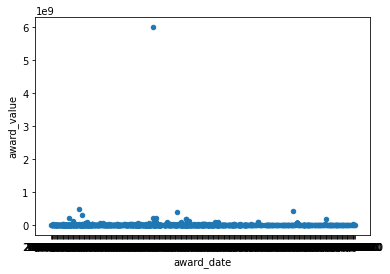

In [73]:
import matplotlib.pyplot as plt
out_df.plot(kind='scatter', x='award_date', y='award_value')

In [74]:
#out_df.hist(column='award_value', by='supplier')

In [ ]:
# beneficial ownership
# file in contracts/ownership but too large to open on macbook
# try on rog